# Brain Tumor Classifier

## Intro to the problem
**Brain tumor**: a growth of abnormal cells that are either within or around the structure of the brain

**Datasets**:
2 datasets from Kaggle, one contains more than 3,000 images of MRI, the other has more than 7,000 images



The purpose of this project is to create a machine learning model that is capable of classifying correct brain tumors' types (meningioma, glioma, pituitary) with an aim of over 93%.

Since we downloaded 2 dataset from Kaggle, we can try to find duplicate images in both training & testing dataset, then use the smaller folder as a validation dataset

##II. Preprocessing

###1. Finding duplicate images
- Since we have imported 2 datasets from Kaggle, there'll certainly be duplicates among the images. Our goal is to sort all of the duplicates, put them into a separate folder and only use the rest of the images
- We'll install difPy package -  which searches for for images in one or more different folders, compares the images it found and checks whether these are duplicates or not, more info: (https://pypi.org/project/difPy/)

In [ ]:
pip install difPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 81.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [ ]:
from difPy import dif

We'll search for duplicate images between 2 folders, "Testing" and "Testing_2" from different sources to make sure later on when training the model, we don't overfit, then move the duplicate images to a new folder called "Testing_duplicate"

In [ ]:
search = dif(['/content/drive/MyDrive/brain_tumor/Testing', '/content/drive/MyDrive/brain_tumor/Testing_2'], move_to='/content/drive/MyDrive/brain_tumor/Testing_duplicate')

difPy preparing files: [1705/1705] [100%]
difPy comparing images: [1705/1705] [100%]
Moved 307 image(s) to /content/drive/MyDrive/brain_tumor/Testing_duplicate
Found 307 pair(s) of duplicate image(s) in 355.2462 seconds.


In [ ]:
# Try the code once again with "Testing" & "Testing_2" to make sure it worked
search_checked = dif(['/content/drive/MyDrive/brain_tumor/Testing', '/content/drive/MyDrive/brain_tumor/Testing_2'])

difPy preparing files: [1398/1398] [100%]
difPy comparing images: [1398/1398] [100%]
Found 0 pair(s) of duplicate image(s) in 1005.7456 seconds.


After checking we, didn't find any duplicate images in both "Testing" and "Testing_2" folder, which proved our code worked. We'll next find duplicate images between "Training" and "Training_2" folder

In [ ]:
search_train = dif(['/content/drive/MyDrive/brain_tumor/Training', '/content/drive/MyDrive/brain_tumor/Training_2'],
                   move_to='/content/drive/MyDrive/brain_tumor/Training_duplicate')

difPy preparing files: [8582/8582] [100%]
difPy comparing images: [8582/8582] [100%]
Moved 2291 image(s) to /content/drive/MyDrive/brain_tumor/Training_duplicate
Found 2291 pair(s) of duplicate image(s) in 9999.4883 seconds.


## Put all of the Training_2 images into Training folder (Done!)

In [ ]:
import os
import glob
import shutil

# Move all of the images from each category - meningioma_2 - in Training_2 folder to Training file
source = '/content/drive/MyDrive/brain_tumor/training_2/meningioma_tumor'
destination = '/content/drive/MyDrive/brain_tumor/Training/meningioma'
#
# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)

In [ ]:
# Move all of the images from no_tumor in Training_2 folder to Training file
source = '/content/drive/MyDrive/brain_tumor/training_2/no_tumor'
destination = '/content/drive/MyDrive/brain_tumor/Training/notumor'
#
# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)

In [ ]:
# Move all of the images from pituitary in Training_2 folder to Training file
source = '/content/drive/MyDrive/brain_tumor/training_2/pituitary_tumor'
destination = '/content/drive/MyDrive/brain_tumor/Training/pituitary'
#
# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)

In [ ]:
#After moving, check for duplicates once again to make sure
search = dif("/content/drive/MyDrive/brain_tumor/Training")

difPy preparing files: [6291/6291] [100%]
difPy comparing images: [6291/6291] [100%]
Found 0 pair(s) of duplicate image(s) in 8256.5947 seconds.


#1. Prepping the data

In [4]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [5]:
# Mounted Google Drive to Colab Notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Import all MRI images into drive
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/brain_tumor'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (270).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (282).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (293).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (262).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (273).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (288).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (264).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (259).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (275).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (260).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (279).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (29).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (30).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (252).jpg
/content/drive/MyDrive/brain_tumor/Training/glioma/gg (

In [1]:
# Import Keras libraries and packages accordingly to train neural network
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

In [2]:
# Import some more packages for viewing images, convert them into Tensor and splitting images into training/testing
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [25]:
X_train = []
Y_train = []
image_size = 150 # We'll set every image size into 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels:
  folder_path = os.path.join('/content/drive/MyDrive/brain_tumor/Training', i)
  for j in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, j))
    img = cv2.resize(img, (image_size, image_size))
    X_train.append(img)
    Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

Other way to approach this problem is to include the training and testing files into X_train and Y_train to increase the number of images the machine can learn. However, this approach might lead to our machine overfit the data and hence, lead to

In [ ]:
# for i in labels:
#   folder_path = os.path.join('/content/drive/MyDrive/brain_tumor/Testing', i)
#   for j in os.listdir(folder_path):
#     img = cv2.imread(os.path.join(folder_path, j))
#     img = cv2.resize(img, (image_size, image_size))
#     X_train.append(img)
#     Y_train.append(i)

In [8]:
# To prevent bias before the training, we shuffle the dataset to randomize the order of the dataset presented
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)
X_train.shape

(6291, 150, 150, 3)

Now in the X_train, we have 6291 images, each has a size of width and height is 150, 150


In [9]:
X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

In [10]:
y_train_new = []
for i in Y_train:
  y_train_new.append(labels.index(i))

y_train = y_train_new
# Convert it into categorical: 0 - glioma tumor, 1 - meningioma tumor, 2 - no tumor, 3 - pituitary tumor
Y_train = tf.keras.utils.to_categorical(y_train)

In [11]:
y_test_new = []
for i in y_test:
  y_test_new.append(labels.index(i))

y_test = y_test_new
# Convert it into categorical:
Y_test = tf.keras.utils.to_categorical(y_test)

In [1]:
# Check the shape of y_train
Y_train.shape

NameError: ignored

In [28]:
print(x_test.shape)
print(y_test.shape)

(630, 150, 150, 3)
(630,)


#2. Training with CNN (without augmentation)

##2.2. Basic model with 1 layer of CNN

In [13]:
# Define the mode
model1 = Sequential()

# Add single layer (Dense) to the model
model1.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu',
                  input_shape = (150, 150, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output before passing it to Dense layer
model1.add(Flatten())
# Add a Dense layer
model1.add(Dense(units=4, activation = 'softmax'))
# Compile the model
model1.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Print a summary of the model architectures
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 4)                 700932    
                                                                 
Total params: 701828 (2.68 MB)
Trainable params: 701828 (2.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Fit the model to our data
model1.fit(X_train, Y_train, epochs = 50, validation_split= 0.1)

Epoch 1/50
160/160 [==============================] - 3s 19ms/step - loss: 3.7880e-07 - accuracy: 1.0000 - val_loss: 2.7034 - val_accuracy: 0.8536
Epoch 2/50
160/160 [==============================] - 2s 10ms/step - loss: 3.4646e-07 - accuracy: 1.0000 - val_loss: 2.7175 - val_accuracy: 0.8536
Epoch 3/50
160/160 [==============================] - 2s 9ms/step - loss: 3.1747e-07 - accuracy: 1.0000 - val_loss: 2.7314 - val_accuracy: 0.8501
Epoch 4/50
160/160 [==============================] - 2s 10ms/step - loss: 2.9058e-07 - accuracy: 1.0000 - val_loss: 2.7437 - val_accuracy: 0.8519
Epoch 5/50
160/160 [==============================] - 2s 10ms/step - loss: 2.6622e-07 - accuracy: 1.0000 - val_loss: 2.7553 - val_accuracy: 0.8554
Epoch 6/50
160/160 [==============================] - 2s 10ms/step - loss: 2.4392e-07 - accuracy: 1.0000 - val_loss: 2.7680 - val_accuracy: 0.8536
Epoch 7/50
160/160 [==============================] - 2s 10ms/step - loss: 2.2304e-07 - accuracy: 1.0000 - val_loss: 2.

In [26]:
loss, accuracy = model1.evaluate(x_test, y_test)

# Print the accuracy
print(f"Test Accuracy: {accuracy:.4f}")

ValueError: ignored

### 2.2. Basic model with 9 layers of CNN
- In this first attempt, we will try to create out own Convolutional Neural Networks using pre-determined training and testing data set.
- Our CNN will contain 9 layers, and the activation function will be Softmax(Using Softmax since we're dealing with probabilities - for each type of image, there will be, for example, 60% no tumor, 30% meningioma tumor, and so on).
Otherwise, we'll use sigmoid function
- **Dropout**: This layers omits some neurons at each step, making them more independent and avoid overfitting.
- **Dense**: output layer which uses 'softmax' function to classify images into 1 out of 4 possible classes

In [ ]:
# Create 9 Convo

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
# Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer= 'Adam',
              metrics = ['accuracy'])

In [ ]:
# We already saved our model so we don't need to fit the model again!

history = model.fit(X_train, Y_train, epochs = 100, validation_split= 0.1)

Epoch 1/100
160/160 [==============================] - 35s 110ms/step - loss: 1.5843 - accuracy: 0.4437 - val_loss: 0.8830 - val_accuracy: 0.6508
Epoch 2/100
160/160 [==============================] - 15s 94ms/step - loss: 0.7395 - accuracy: 0.6875 - val_loss: 0.6669 - val_accuracy: 0.7443
Epoch 3/100
160/160 [==============================] - 15s 96ms/step - loss: 0.5945 - accuracy: 0.7470 - val_loss: 0.7100 - val_accuracy: 0.7072
Epoch 4/100
160/160 [==============================] - 15s 97ms/step - loss: 0.5207 - accuracy: 0.7756 - val_loss: 0.6015 - val_accuracy: 0.7637
Epoch 5/100
160/160 [==============================] - 15s 96ms/step - loss: 0.4565 - accuracy: 0.8015 - val_loss: 0.5367 - val_accuracy: 0.7760
Epoch 6/100
160/160 [==============================] - 15s 96ms/step - loss: 0.4370 - accuracy: 0.8192 - val_loss: 0.5986 - val_accuracy: 0.7707
Epoch 7/100
160/160 [==============================] - 15s 97ms/step - loss: 0.3745 - accuracy: 0.8439 - val_loss: 0.5081 - val_a

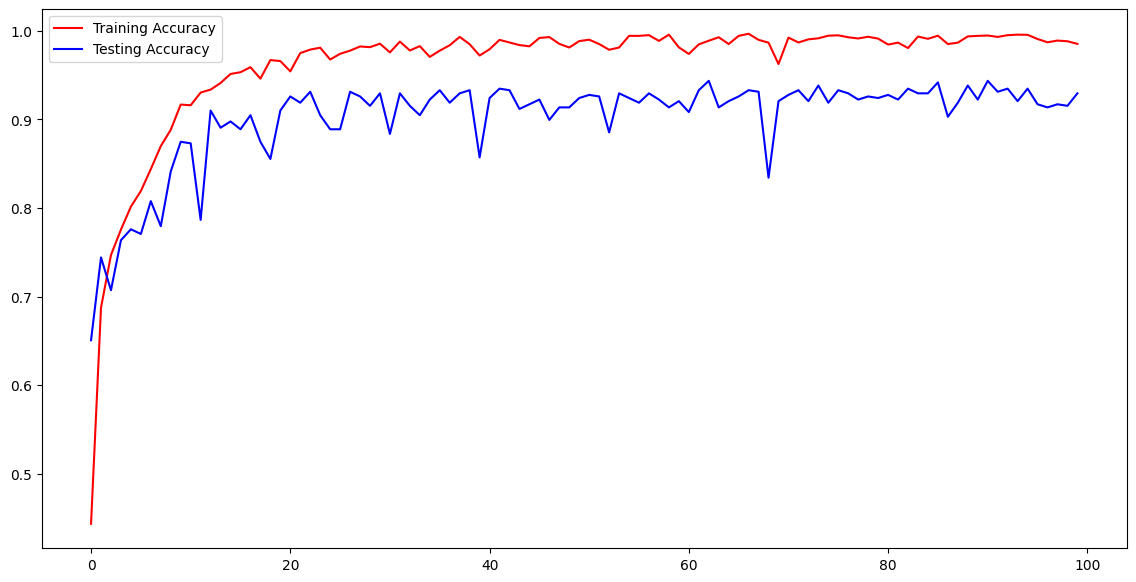

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# We already saved our model so we don't need to run it again
model.save('braintumor.h5')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize = (14, 7))
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Testing Accuracy')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
print(acc, val_acc)

[0.4436592161655426, 0.6874754428863525, 0.7469571828842163, 0.7756183743476868, 0.801531195640564, 0.8191990852355957, 0.8439340591430664, 0.8698468804359436, 0.8882999420166016, 0.9167647957801819, 0.9159795641899109, 0.9303101897239685, 0.9336474537849426, 0.9411072134971619, 0.9513152837753296, 0.9532783627510071, 0.9589713215827942, 0.946014940738678, 0.9670200347900391, 0.9658421874046326, 0.9542599320411682, 0.9748724102973938, 0.9787985682487488, 0.9809579849243164, 0.9676089286804199, 0.9740871787071228, 0.9776207208633423, 0.982332170009613, 0.981546938419342, 0.985473096370697, 0.9756576418876648, 0.98782879114151, 0.9778170585632324, 0.9827247858047485, 0.9705535769462585, 0.9776207208633423, 0.9837062954902649, 0.9931291937828064, 0.9848842024803162, 0.9721240401268005, 0.9791911840438843, 0.9897919297218323, 0.9868472814559937, 0.983902633190155, 0.9825284481048584, 0.9919512867927551, 0.9929328560829163, 0.9852768182754517, 0.9811543226242065, 0.9884177446365356, 0.98998

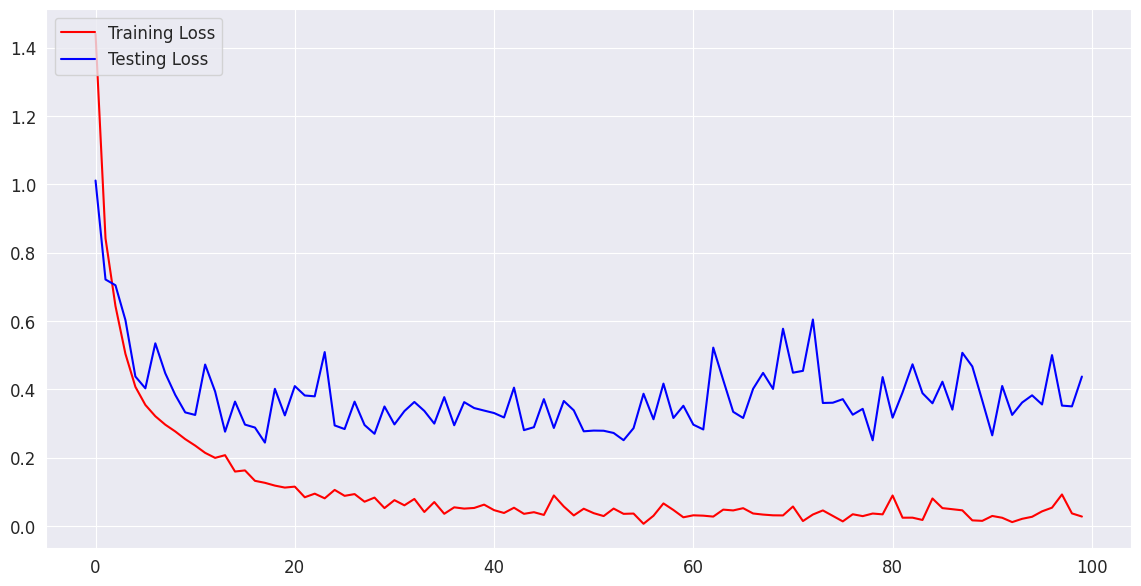

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

fig = plt.figure(figsize = (14, 7))
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Testing Loss')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
prediction = model.predict(x_test)
cm = confusion_matrix(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

## Prediction

In [ ]:
# Predict an image
img = cv2.imread('/content/drive/MyDrive/brain_tumor/Testing/notumor/image(100).jpg')
img = cv2.resize(img, (150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

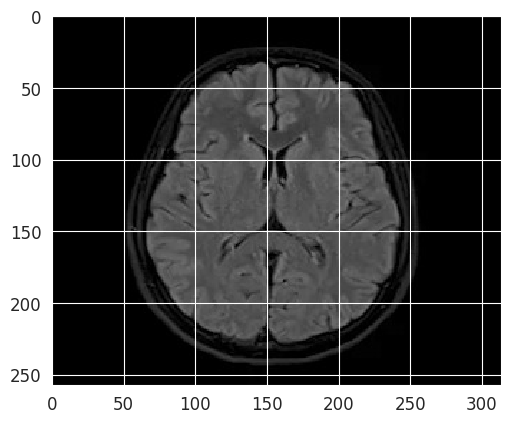

1/1 [==============================] - 1s 1s/step


2

In [ ]:
# Reshape img to fit our model
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

# Visualize the image
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/brain_tumor/Testing/notumor/image(100).jpg')
plt.imshow(img, interpolation = 'nearest')
plt.show()

# Predict the label using our model
a = model.predict(img_array)
# Get the largest probability
indices = a.argmax()
indices

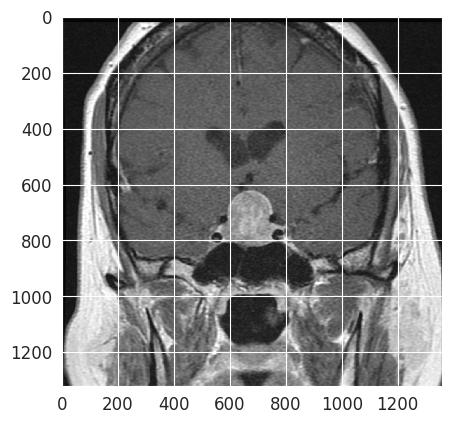

1/1 [==============================] - 0s 33ms/step


3

In [ ]:
# Predict another image
img = cv2.imread('/content/drive/MyDrive/brain_tumor/Testing/pituitary/image(28).jpg')
img = cv2.resize(img, (150,150))
img_array = np.array(img)
img_array.shape
# Reshape img to fit our model
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

# Visualize the image
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/brain_tumor/Testing/pituitary/image(28).jpg')
plt.imshow(img, interpolation = 'nearest')
plt.show()

# Predict the label using our model
a = model.predict(img_array)
# Get the largest probability
indices = a.argmax()
indices

#2. CNN with data augmentation
### 2.2. Basic models with more cleaning


> Firstly, finding medical image is already a challenge, accessibility poses even greater concern. Secondly, getting a massive amount of dataset quite challenging due to the fact that this type of data is not always publicly avaiable. Therefore, if we can find a way to expan our dataset from, for example, 1000 images to 2000 images, our machine learning model will at a more advantageous position

Augmenting images will help reduce the overfitting and improve the precision of the proposed models.

Beside, during the process of loading datasets, we'll also **remove image noise**  and **normalize images into range 0 to 1**



In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.layers import Input, Dropout, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# We'll load the training dataset once again
X_train = []
y_train = []
X_test = []
y_test = []

image_size = 150 # We'll set every image size into 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels:
  folder_path = os.path.join('/content/drive/MyDrive/brain_tumor/Training', i)
  for j in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, j))
    img = cv2.bilateralFilter(img, 2, 50, 50) # Remove image noise
    img = cv2.resize(img, (image_size, image_size)) # Resize img into 150*150
    X_train.append(img)
    y_train.append(i)

  test_path = os.path.join('/content/drive/MyDrive/brain_tumor/Testing', i)
  for j in os.listdir(test_path):
    image = cv2.imread(os.path.join(test_path, j))
    image = cv2.bilateralFilter(image, 2, 50, 50)
    image = cv2.resize(image, (image_size, image_size))
    X_test.append(image)
    y_test.append(i)


X_train = np.array(X_train) / 255.0 # Normalize images into range 0 - 1 (8-bit image)
X_test = np.array(X_test) / 255.0

In [ ]:
print(X_train.shape)
print(X_test.shape)

(6291, 150, 150, 3)
(314, 150, 150, 3)


In [ ]:
# To prevent bias before the training, we shuffle the dataset to randomize the order of the dataset presented
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In computer vision, the pixel normalization technique is often used to [speed up model learning](https://www.imaios.com/en/resources/blog/ct-images-normalization-zero-centering-and-standardization#:~:text=In%20computer%20vision%2C%20the%20pixel,a%2016%2Dbit%20image)

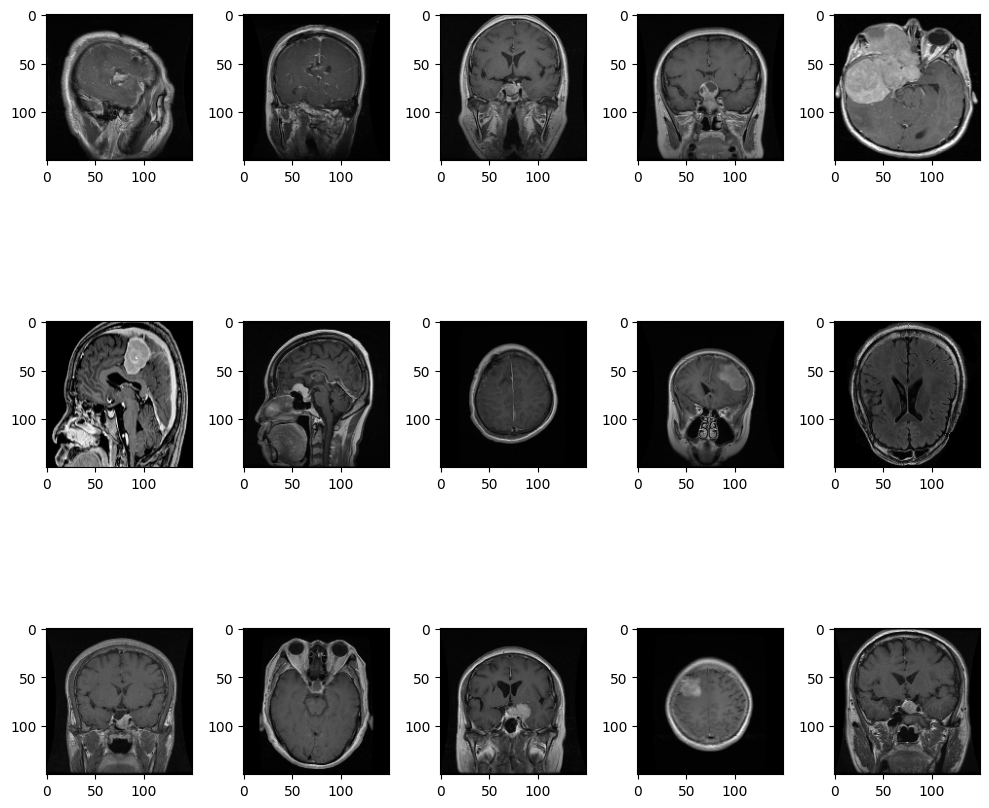

In [ ]:
# Visualize the image
images = [X_train[i] for i in range(15)]
fig, axes = plt.subplots(3, 5, figsize = (10, 10))
axes = axes.flatten()
for img, ax in zip(images, axes):
  ax.imshow(img)
plt.tight_layout()
plt.show()

In [ ]:
from tables.array import ImageArray
# ImageDataGenerator transform each image in the btach by a series of random translation, rotations, etc.
datagen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.05,
    height_shift_range = 0.05,
    horizontal_flip = True
)
# After creating and configuring ImageDataGenerator, we'll fit it into our data
datagen.fit(X_train)

In our 2nd attempt, we'll try creating a function for the machine to loop through a different variations of optimizers, activation function, etc to find out the best one for our machine learning model

In [ ]:
%pip install bayesian-optimization==1.4.1

Reason for being yanked: https://github.com/fmfn/BayesianOptimization/pull/388


In [ ]:
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
score_acc = make_scorer(accuracy_score)

In [ ]:
# Create function
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', 'LeakyReLU','relu']

    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)

    def nn_cl_fun():
      opt = Adam(lr = learning_rate)
      nn = Sequential()
      nn.add(Dense(neurons, input_dim=10, activation=activation))
      nn.add(Dense(neurons, activation=activation))
      nn.add(Dense(1, activation='sigmoid'))
      nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
      return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [ ]:
# Set paramaters
params_nn ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

3. CNN (add validating files)

> Indented block


- In our 2nd attempt, besides training with only the training & testing data, we'll add another validating sets to estimate our model's skills while tuning the hyperparameters


#3. Resnet34
In out 3rd attempt, we'll use pre-trained neural network - Resnet 34 to train our dataset and compare it with the other 2 models to see how efficient it's

In [ ]:
# In case gdrive is not connected

import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
# Import libraries from fastbook
from fastbook import *
import nibabel as nib
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

In [ ]:
import os
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
# Import the necessary modules from fastbook
from fastbook import *
# Import modules from Fastai
from fastai.vision import *
import numpy as np

In [ ]:
# We'll do image augmentation using Fastai library

tfms = aug_transforms(do_flip=False)
path = '/content/gdrive/MyDrive/brain_tumor'
data = ImageDataLoaders.from_folder(path, train = 'Training', valid = 'Validation',
                                    item_tfms = Resize(150), seed = 42,
                                    num_workers = 3, bs = 64, valid_pct=0.2)

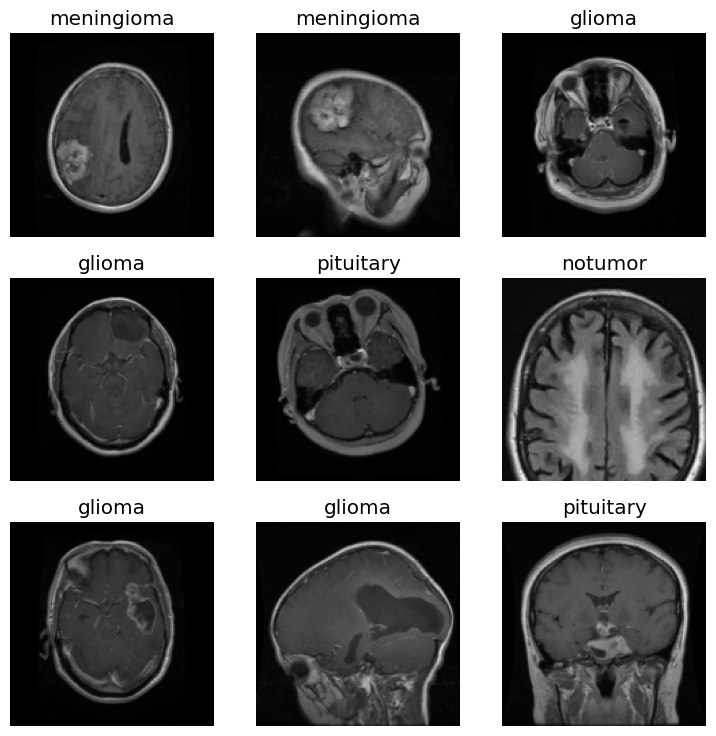

In [ ]:
data.show_batch()

In [ ]:
my_trained_mod = cnn_learner(data, models.resnet34, metrics=error_rate)
my_trained_mod.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.906383,0.382208,0.126871,00:55
1,0.460920,0.245724,0.086532,00:55
2,0.281776,0.166983,0.061809,00:52
3,0.177323,0.151926,0.056604,00:52
4,0.132217,0.149971,0.052700,00:51


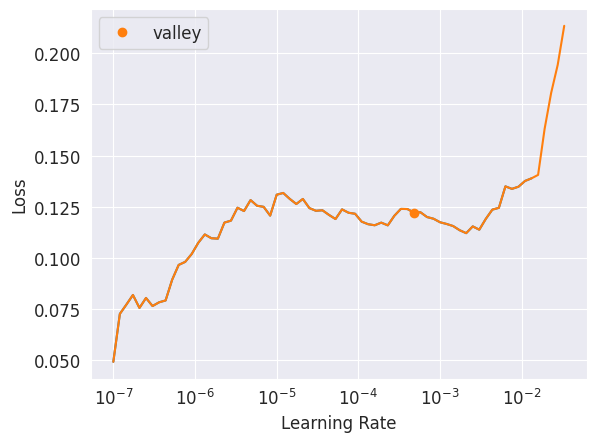

In [ ]:
# Check the learning rate
my_trained_mod.lr_find()
plt.plot(my_trained_mod.recorder.lrs, my_trained_mod.recorder.losses)

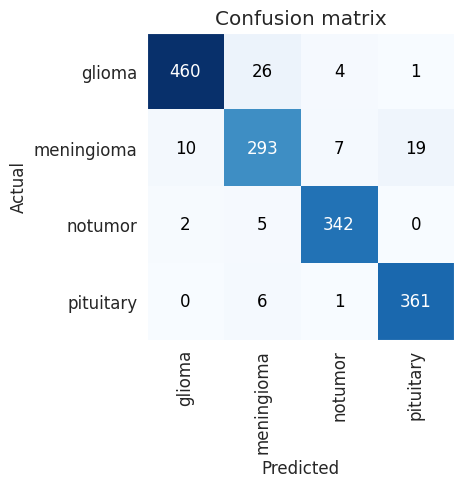

In [ ]:
interp = ClassificationInterpretation.from_learner(my_trained_mod)
interp.plot_confusion_matrix()

In [ ]:
interp = ClassificationInterpretation.from_learner(my_trained_mod)
upp, low = interp.confusion_matrix()
tn, fp = upp[0], upp[1]
fn, tp = low[0], low[1]
specificity = tn/(fp + tn)

ValueError: ignored

In [ ]:
specificity # Correctly classify images

In [ ]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(recall)
print(precision)

NameError: ignored